# Wrist-Worn Accelerometer Dataset Classification

In this notebook, the Wrist-Worn Accelerometer Dataset is classified using `scikit-learn` library.|

The dataset analysis is thoroughly discussed in the posts:
1. https://iliazaitsev.me/blog/2018/05/19/kmeans-quantizer
2. https://iliazaitsev.me/blog/2018/06/27/decision-trees

The code in this notebook is partially taken from [this snippet](https://github.com/devforfu/Blog/blob/master/trees/scikit_learn.py).

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [131]:
import os
from os.path import join
import textwrap

In [21]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import patches
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import font_manager

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [6]:
# imports from local snippet in this repo
from scikit_learn import AccelerometerDatasetReader
from scikit_learn import BatchTransformer
from scikit_learn import KMeansQuantization

## Grid Search

First of all, we're reading the dataset and preparing pipeline of transformers and `RandomForestClassifier`:

In [7]:
np.random.seed(1)

In [8]:
root = join('datasets', 'adl')
reader = AccelerometerDatasetReader()
reader.read(root)
X, y = reader.dataset

In [9]:
pipeline = make_pipeline(
    BatchTransformer(StandardScaler()),
    KMeansQuantization(),
    RandomForestClassifier())

Next, we create a grid with parameters to run the search to find the best possible configuration:

In [88]:
params_grid = {
    'kmeansquantization__k': [2, 3, 4],
    'randomforestclassifier__n_estimators': [10, 100, 250, 500],
    'randomforestclassifier__max_depth': [1, 10, None]
}
search = GridSearchCV(pipeline, params_grid, scoring='accuracy', n_jobs=-1, verbose=2)

In [89]:
search.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=100 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=100 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=100 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=250 
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=2, randomforestclassifier__max_depth=1, r

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.8min


[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  33.0s
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=500 
[CV]  kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  33.2s
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=500 
[CV]  kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=100, total=  33.6s
[CV]  kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=100, total=  33.2s
[CV] kmeansquantization__k=2, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=500 
[CV] kmeansquantization__k=3, randomforestclas

[CV] kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  41.0s
[CV] kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  41.6s
[CV] kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=500 
[CV]  kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  41.3s
[CV] kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=500 
[CV]  kmeansquantization__k=3, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=100, total=  42.1s
[CV] kmeansquantization__k=3, randomforestclass

[CV] kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=4, randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500, total=  43.6s
[CV] kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  43.2s
[CV] kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=250 
[CV]  kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  42.3s
[CV] kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=500 
[CV]  kmeansquantization__k=4, randomforestclassifier__max_depth=None, randomforestclassifier__n_estimators=10, total=  41.4s
[CV] kmeansquantization__k=4, randomforestclassif

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 15.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('batchtransformer', BatchTransformer(base_transformer=StandardScaler(copy=True, with_mean=True, with_std=True))), ('kmeansquantization', KMeansQuantization(k=5)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kmeansquantization__k': [2, 3, 4], 'randomforestclassifier__n_estimators': [10, 100, 250, 500], 'randomforestclassifier__max_depth': [1, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [90]:
cv_results = search.cv_results_

In [91]:
params = pd.DataFrame(cv_results['params']).rename(columns={
    'kmeansquantization__k': 'k',
    'randomforestclassifier__max_depth': 'max_depth',
    'randomforestclassifier__n_estimators': 'n_estimators'
})
params['mean_train_score'] = cv_results['mean_train_score']
params['mean_test_score'] = cv_results['mean_test_score']

In [92]:
params

,k,max_depth,n_estimators,mean_train_score,mean_test_score
0,2,1.0,10,0.286072,0.284863
1,2,1.0,100,0.314812,0.305125
2,2,1.0,250,0.315517,0.308701
3,2,1.0,500,0.285042,0.252682
4,2,10.0,10,0.764608,0.549464
5,2,10.0,100,0.789682,0.600715
6,2,10.0,250,0.806120,0.606675
7,2,10.0,500,0.786558,0.593564
8,2,NaN,10,0.788397,0.584029
9,2,NaN,100,0.810453,0.623361


In [93]:
best = params.iloc[search.best_index_]
best.to_dict()

{'k': 2.0,
 'max_depth': nan,
 'mean_test_score': 0.6269368295589988,
 'mean_train_score': 0.8016235011703423,
 'n_estimators': 500.0}

In [94]:
params.to_csv('search_params.csv')

In [95]:
params = pd.read_csv('search_params.csv')

In [98]:
no_depth_limit = pd.isna(params.max_depth)
trees_none = params.loc[no_depth_limit]
trees_10 = params.loc[params.max_depth == 10]
stumps = params.loc[params.max_depth == 1]

## The Best Estimator Metrics

In [99]:
def create_accuracy_grid(search_results, title='Ensemble Accuracy', 
                         subtitle='', base_font=None, figsize=(16, 12), 
                         cmap='Reds', background_color=(0, 0, 0, 0), 
                         colors_norm_mult=1.2):
    """
    Creates a diagram with grid of circles showing dependence of 
    the ensemble accuracy from number of clusters and trees.
    """
    clusters = search_results.k.unique()
    estimators = search_results.n_estimators.unique()
    
    scores_matrix = np.array([
        g.mean_test_score.tolist() 
        for _, g in search_results.groupby('k')])
    
    n, m = scores_matrix.shape
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim(left=0, right=m+1)
    ax.set_ylim(bottom=0, top=n+1)
    
    norm = matplotlib.colors.Normalize(
        vmin=scores_matrix.min() / colors_norm_mult,
        vmax=scores_matrix.max() * colors_norm_mult)
    
    color_map = get_cmap(cmap)
    
    radiuses = np.log(1 + scores_matrix)
    
    if base_font is None:
        base_font = font_manager.FontProperties('monospace')
    
    ticks_font = base_font.copy()
    ticks_font.set_size(20)
    label_font = base_font.copy()
    label_font.set_size(22)
    annot_font = base_font.copy()
    annot_font.set_weight('light')
    annot_font.set_size(22)
    
    for i in range(n):
        for j in range(m):
            x, y = j + 1, i + 1
            score = scores_matrix[i, j]
            color = color_map(norm(score))
            circle = patches.Circle((x, y), radius=radiuses[i, j], color=color)
            ax.add_patch(circle)
            ax.annotate(f'{score:2.2%}', xy=(x, y), 
                        color='#ffffff', va='center', ha='center',
                        fontproperties=annot_font)
    
    ax.set_xticks(range(1, m + 1))
    ax.set_xticklabels(estimators, fontproperties=ticks_font)
    ax.set_yticks(range(1, n + 1))
    ax.set_yticklabels(clusters, fontproperties=ticks_font)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("# of Trees", fontproperties=label_font)
    ax.set_ylabel("# of Clusters", fontproperties=label_font)
    
    title_font = base_font.copy()    
    title_font.set_size(26)
    fig.suptitle(title, fontproperties=title_font)
    title_font.set_size(22)
    ax.set_title(subtitle, fontproperties=title_font)
    fig.tight_layout(pad=5.0)
    ax.set_facecolor(background_color)
    
    return fig

In [100]:
font_path = join(os.getcwd(), 'fonts', 'RobotoSlab-Light.ttf')
font = font_manager.FontProperties(fname=font_path)

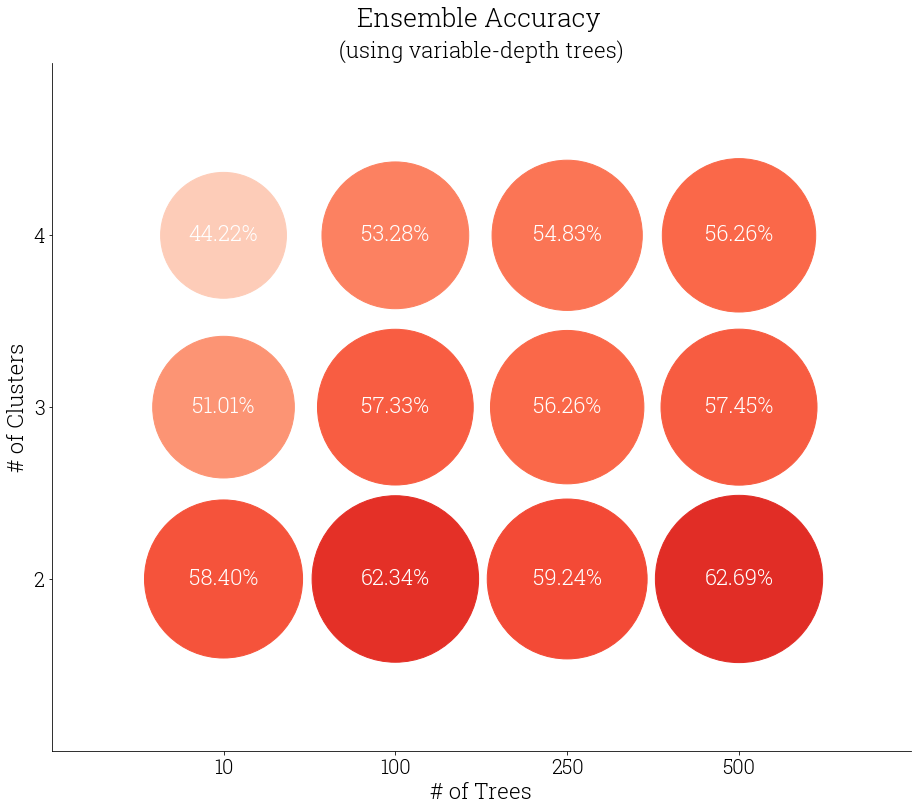

In [105]:
fig = create_accuracy_grid(
    search_results=trees_none, 
    base_font=font,
    title='Ensemble Accuracy',
    subtitle='(using variable-depth trees)')

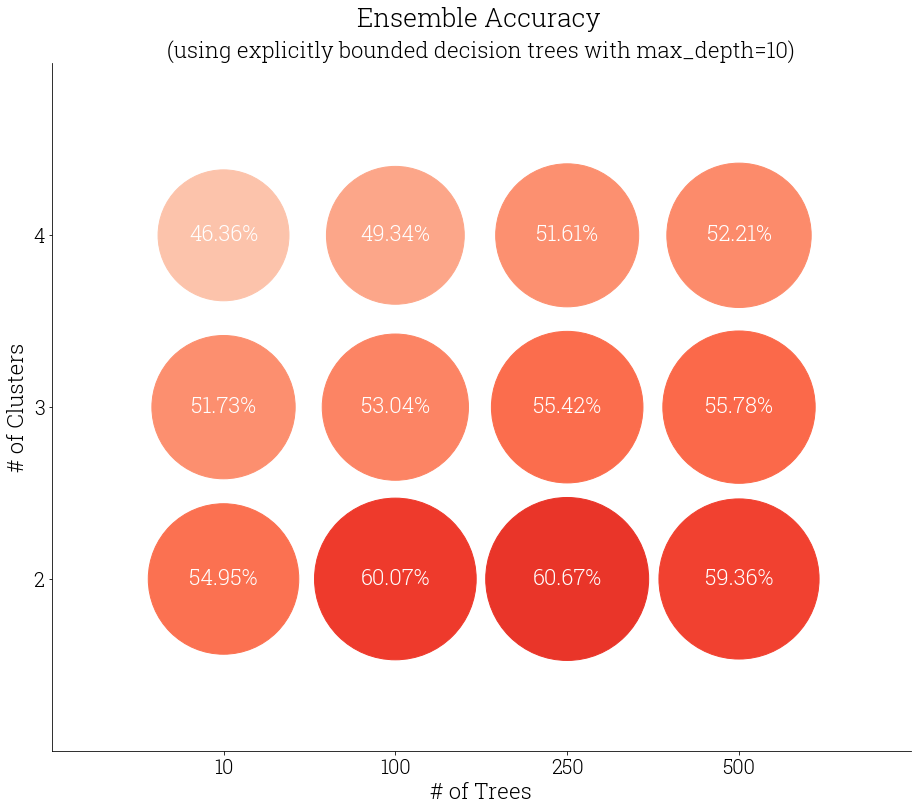

In [106]:
fig = create_accuracy_grid(
    search_results=trees_10,
    base_font=font,
    title='Ensemble Accuracy',
    subtitle='(using explicitly bounded decision trees with max_depth=10)')

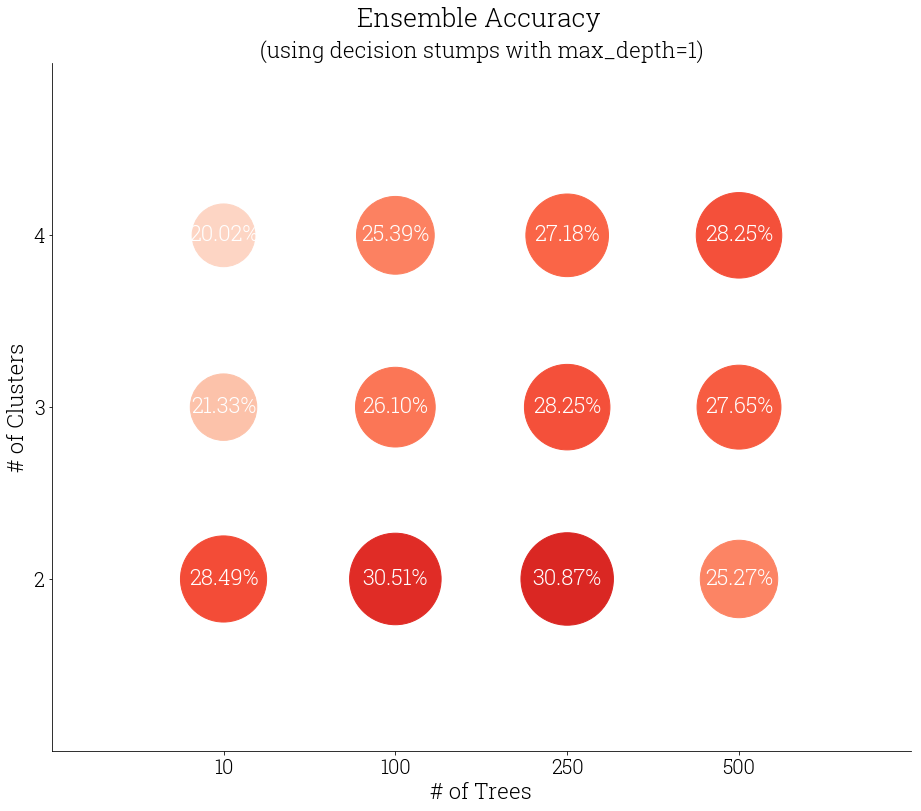

In [107]:
fig = create_accuracy_grid(
    search_results=stumps,
    base_font=font,
    title='Ensemble Accuracy',
    subtitle='(using decision stumps with max_depth=1)')

## The Final Model

Now we can train the final model with trained with the best parameters we've discovered.

In [10]:
pipeline = make_pipeline(
    BatchTransformer(StandardScaler()),
    KMeansQuantization(k=2),
    RandomForestClassifier(n_estimators=500, max_depth=None))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('batchtransformer', BatchTransformer(base_transformer=StandardScaler(copy=True, with_mean=True, with_std=True))), ('kmeansquantization', KMeansQuantization(k=2)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [126]:
y_pred = pipeline.predict(X_test)
test_acc = np.mean(y_pred == y_test)
print(f'Test set accuracy: {test_acc:2.2%}')

Test set accuracy: 69.05%


In [176]:
conf_mat = confusion_matrix(y_test, y_pred)

In [177]:
def plot_conf_mat(matrix, class_names=None, plot_size=8, font_size=20,
                  tick_font_size=16, filename=None, cm='Reds', ax=None,
                  ticks_wrap=15):
    """
    Plots a confusion matrix.
    """
    assert matrix.shape[0] == matrix.shape[1]

    if not ax:
        fig = plt.figure(figsize=(plot_size, plot_size))
        ax = fig.add_subplot(111, aspect='equal')

    w = h = 1
    values_font = font_manager.FontProperties(size=font_size)
    n = matrix.shape[0]
    color_map = get_cmap(cm)
    norm = matplotlib.colors.Normalize(vmin=0, vmax=matrix.max()*2)
    ax.set_xlim(left=0, right=n)
    ax.set_ylim(bottom=0, top=n)

    for i in range(n):
        for j in range(n):
            x, y = i * w, j * w
            value = matrix[n - j - 1, i]
            color = color_map(norm(value))
            rect = patches.Rectangle((x, y), w, h, color=color)
            ax.add_patch(rect)
            ax.annotate(int(value), xy=(x + w / 2, y + h / 2),
                        va='center', ha='center', color='#000000',
                        fontproperties=values_font)

    if class_names is None:
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        if ticks_wrap is not None:
            class_names = [
                '\n'.join(textwrap.wrap(name, width=ticks_wrap))
                for name in class_names]

        ticks = range(n)
        xtick_offset, ytick_offset = w/2, w/2
        ax.set_xticks([xtick_offset + i * w for i in ticks])
        ax.set_yticks([ytick_offset + i * h for i in ticks])
        ax.xaxis.tick_top()
        ax.set_xticklabels(class_names, fontsize=tick_font_size)
        ax.set_yticklabels(reversed(class_names), fontsize=tick_font_size)

    ax.figure.tight_layout()

    if filename:
        ax.figure.savefig(filename)

    return ax

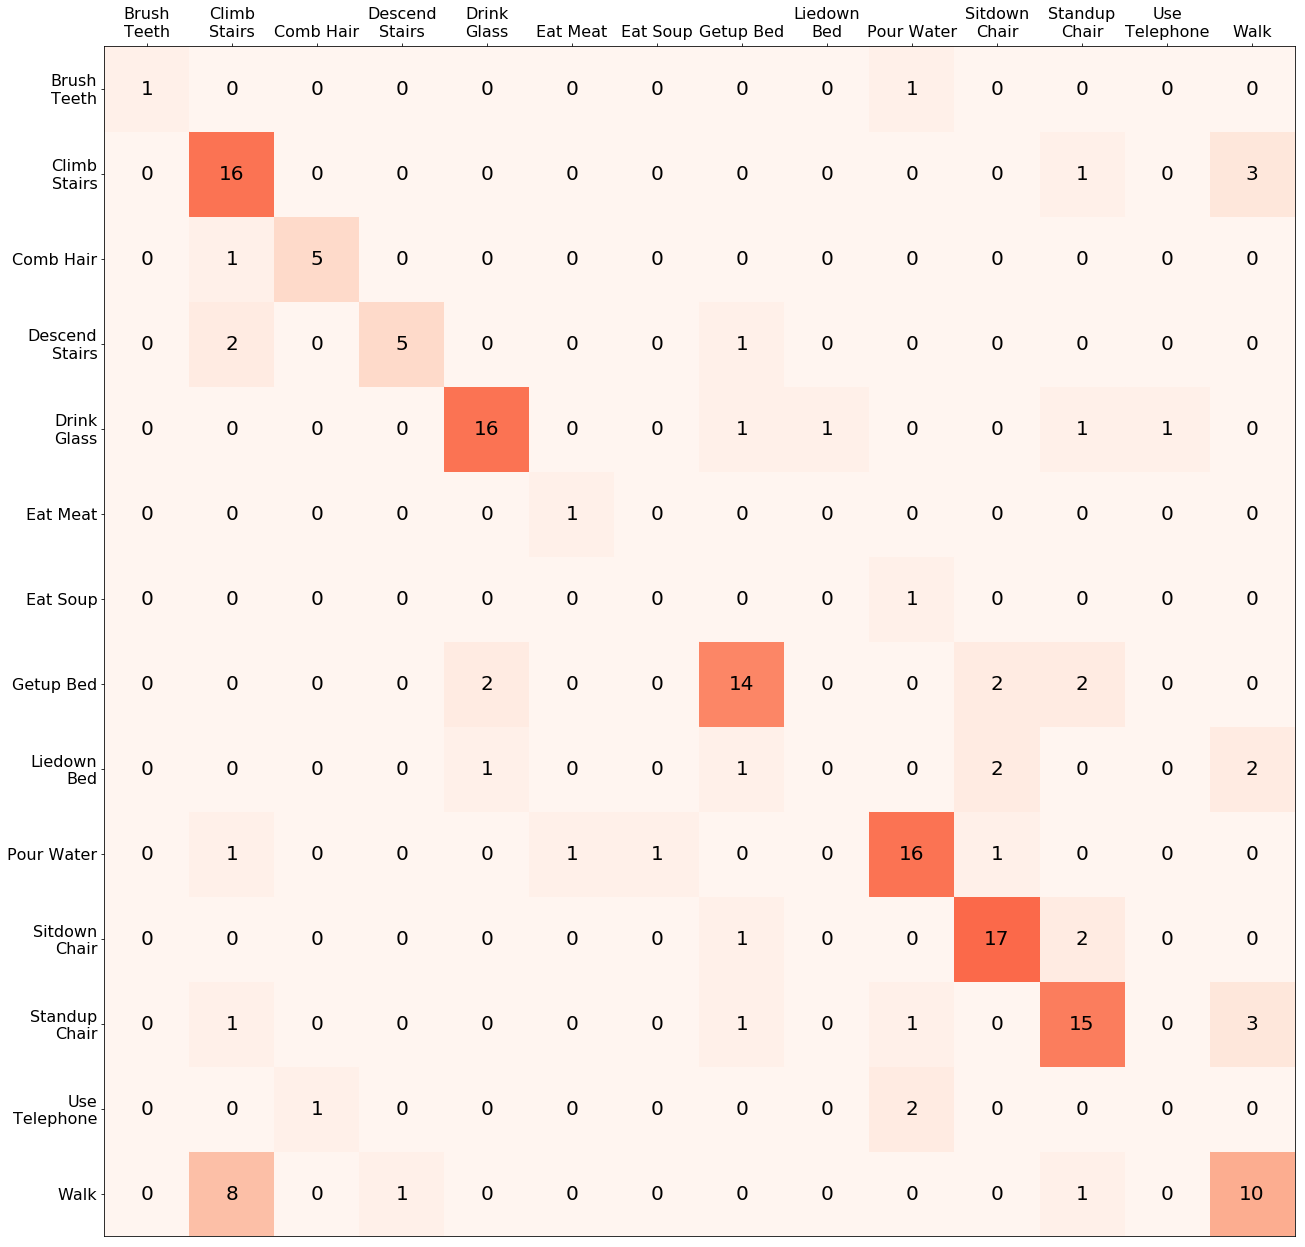

In [178]:
plot_conf_mat(conf_mat, class_names=classes, ticks_wrap=10, plot_size=18)